In [50]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\test.csv")

## DATASET

In [51]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


DATA CLEANING

In [52]:
df.isnull().sum().sum()

np.int64(0)

In [53]:
'''    

The dataset is already cleaned 

'''

'    \n\nThe dataset is already cleaned \n\n'

In [54]:
df.isna().sum().sum()

np.int64(0)

In [55]:
df['Education Level'].unique()

array(['Master’s Degree', 'Associate Degree', 'High School',
       'Bachelor’s Degree', 'PhD'], dtype=object)

In [56]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

## EDA FOR EMPLOYEE ATTRITION

1. Finding different age groups who stayed and left the company

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12304\574297929.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attrition',y='Age',data=df,palette='icefire')


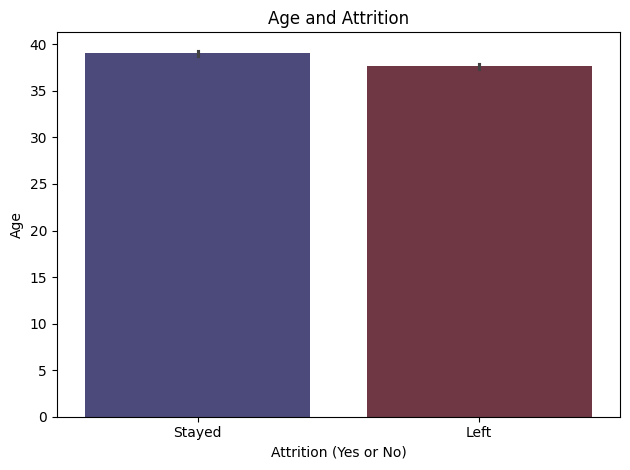

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Attrition',y='Age',data=df,palette='icefire')
plt.title("Age and Attrition")
plt.xlabel("Attrition (Yes or No)")
plt.ylabel("Age")

plt.tight_layout()
plt.show()


CONCLUSION: Age alone does not show a significant difference in attrition rates between employees who stayed and those who left as the number of employees who stayed in the company is slightly above those who left the company.

2. Maximum age group who stayed and left the company

In [58]:
df1=df.groupby(['Age','Attrition']).size().reset_index(name='Count').sort_values('Count',ascending=False).head(2)
print(df1)

    Age Attrition  Count
77   56    Stayed    232
2    19      Left    215


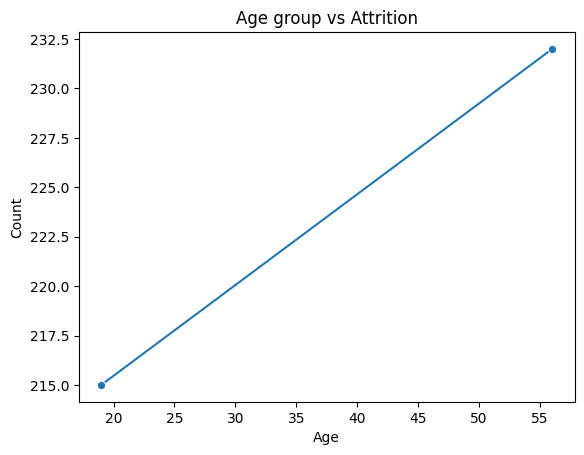

In [59]:
sns.lineplot(data=df1, x='Age', y='Count', marker='o')
plt.title('Age group vs Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

CONCLUSION: Elderly employees of the age group of 56 stayed in the company while young adults in the age group of 19 left the company

3. Monthly income varying across different job roles

In [60]:
df1=df.groupby('Job Role')['Monthly Income'].mean().reset_index().sort_values('Monthly Income',ascending=False).head()
df1

,Job Role,Monthly Income
4,Technology,9115.849541
1,Finance,8525.973340
2,Healthcare,8004.900932
3,Media,5994.212221
0,Education,4489.901831


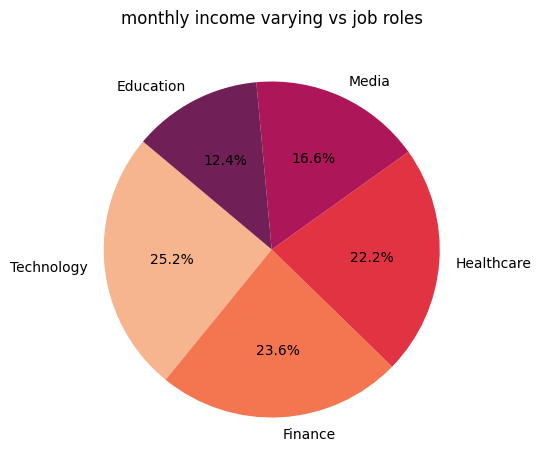

In [61]:
colr=sns.color_palette('rocket_r')
plt.pie(df1['Monthly Income'],labels=df1['Job Role'],colors=colr,autopct='%1.1f%%', startangle=140)
plt.title('monthly income varying vs job roles',pad=30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

CONCLUSION:Technology has highest monthly income of $9115.849541 followed by finance, healthcare, media and education.

4. Comparison of Work-Life Balance for different genders

In [62]:
import numpy as np

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12304\456989781.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender',y='Work-Life Balance',data=df,palette='rocket')


<Axes: xlabel='Gender', ylabel='Work-Life Balance'>

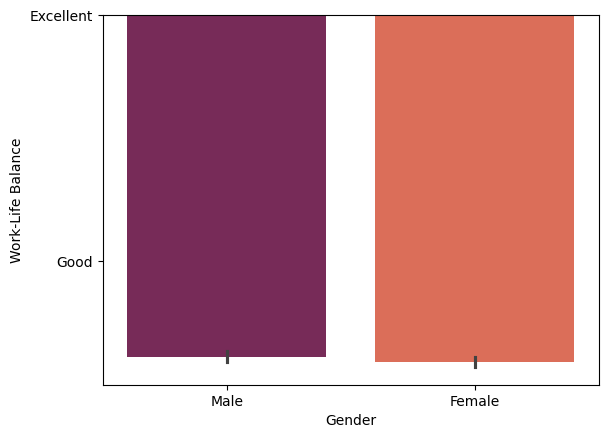

In [63]:
sns.barplot(x='Gender',y='Work-Life Balance',data=df,palette='rocket')

CONCLUSION:The bar chart shows that both male and female workers have a good work-life balance, with a higher proportion of females reporting an excellent work-life balance compared to males. This suggests that women in this company may be experiencing a more positive work-life balance than men.

5. Attrition and Retention rate by job role

In [64]:
import pandas as pd
attrition_rate_by_job_role = df.groupby('Job Role')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rate_by_job_role['Attrition Rate'] = attrition_rate_by_job_role['Stayed'] * 100
attrition_rate_by_job_role['Retention Rate'] = attrition_rate_by_job_role['Left'] * 100
attrition_rate_by_job_role=attrition_rate_by_job_role.reset_index().sort_values(by=['Attrition Rate','Retention Rate'],ascending=False).head()
print(attrition_rate_by_job_role[['Job Role','Attrition Rate','Retention Rate']])


Attrition    Job Role  Attrition Rate  Retention Rate
3               Media       55.491329       44.508671
4          Technology       53.709043       46.290957
1             Finance       52.544838       47.455162
2          Healthcare       51.689977       48.310023
0           Education       51.041667       48.958333


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12304\236943595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_job_role['Job Role'], y=attrition_rate_by_job_role['Attrition Rate'], ax=axes[0], palette='flare')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12304\236943595.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_job_role['Job Role'], y=attrition_rate_by_job_role['Retention Rate'], ax=axes[1], palette='crest')


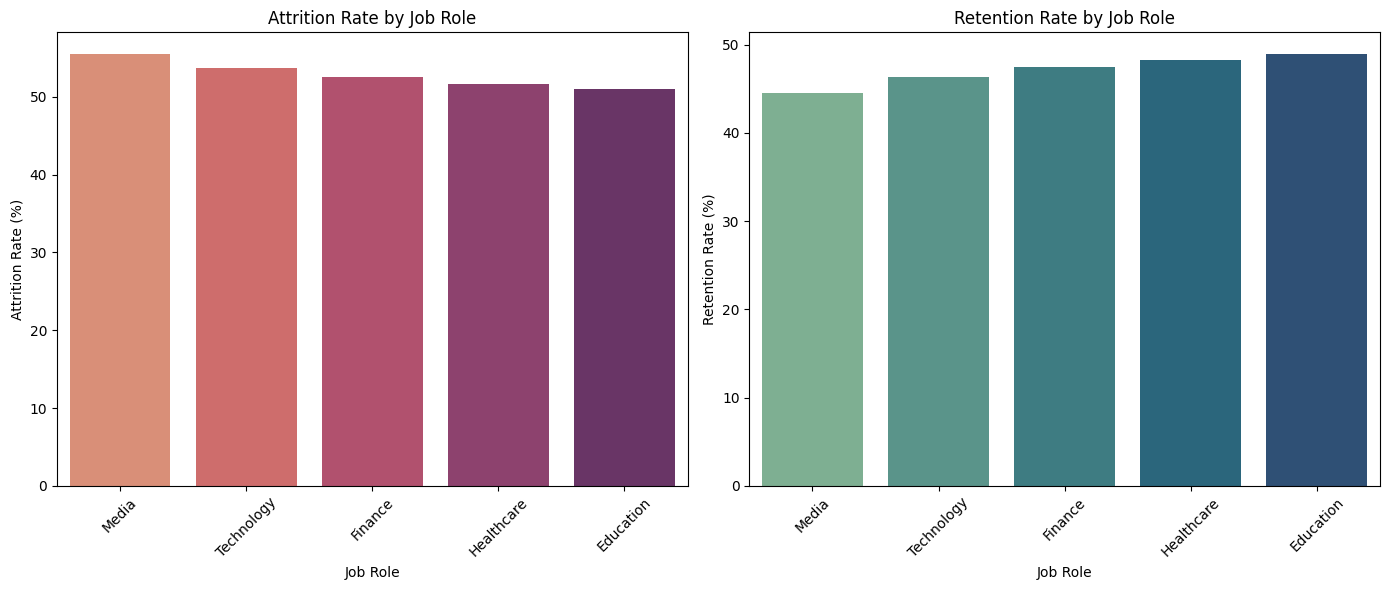

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=attrition_rate_by_job_role['Job Role'], y=attrition_rate_by_job_role['Attrition Rate'], ax=axes[0], palette='flare')
axes[0].set_title('Attrition Rate by Job Role')
axes[0].set_ylabel('Attrition Rate (%)')
axes[0].set_xlabel('Job Role')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=attrition_rate_by_job_role['Job Role'], y=attrition_rate_by_job_role['Retention Rate'], ax=axes[1], palette='crest')
axes[1].set_title('Retention Rate by Job Role')
axes[1].set_ylabel('Retention Rate (%)')
axes[1].set_xlabel('Job Role')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

CONCLUSION: Maximum attrition is seen in the field of media while Education sector shows maximum retension.

6. The number of promotions in different job level

In [66]:
avg_promotions_by_job_level = df.groupby('Job Level')['Number of Promotions'].mean().reset_index().sort_values(by='Number of Promotions',ascending=False)
avg_promotions_by_job_level

,Job Level,Number of Promotions
1,Mid,0.844726
0,Entry,0.831896
2,Senior,0.819073


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12304\4023113185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_promotions_by_job_level['Job Level'],y=avg_promotions_by_job_level['Number of Promotions'],data=avg_promotions_by_job_level, palette='husl')


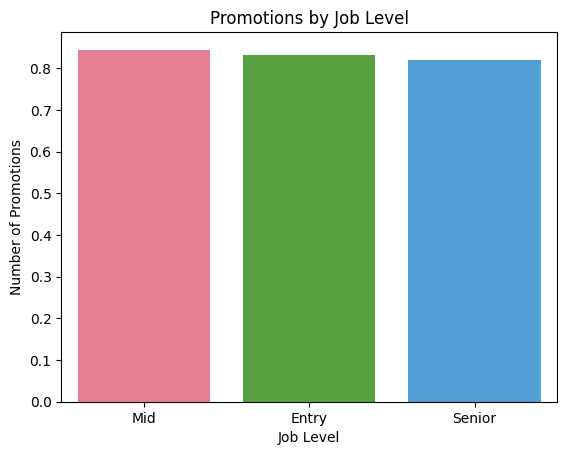

In [67]:
sns.barplot(x=avg_promotions_by_job_level['Job Level'],y=avg_promotions_by_job_level['Number of Promotions'],data=avg_promotions_by_job_level, palette='husl')
plt.title('Promotions by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Number of Promotions')
plt.show()

CONCLUSION: All the three job levels have significant number of promotions where mid level is just slighlty higher than others.

7. Performance rating of different educational qualifications

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12304\3406881741.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Education Level'],y=df['Performance Rating'],data=df, palette='husl')


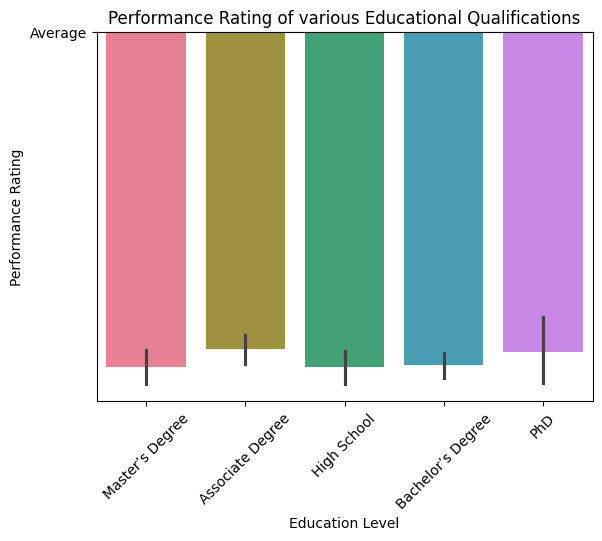

In [68]:
sns.barplot(x=df['Education Level'],y=df['Performance Rating'],data=df, palette='husl')
plt.title('Performance Rating of various Educational Qualifications')
plt.xlabel('Education Level')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)
plt.show()

CONCLUSION: Master's Degree , High School and Bachelor"s Degree has better performance rating than the rest. Hence, they are more likely to show better results and stay longer

8. Job satisfaction, years at the company, and gender influencing the attrition rate

In [69]:

attrition_rate_by_factors = df.groupby(['Job Satisfaction', 'Years at Company', 'Gender'])['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rate_by_factors['Attrition Rate'] = attrition_rate_by_factors['Left'] * 100
print(attrition_rate_by_factors[['Attrition Rate']])


Attrition                                 Attrition Rate
Job Satisfaction Years at Company Gender                
High             1                Female       49.206349
                                  Male         43.930636
                 2                Female       58.666667
                                  Male         42.592593
                 3                Female       65.000000
...                                                  ...
Very High        49               Female       33.333333
                                  Male         50.000000
                 50               Female        0.000000
                                  Male          0.000000
                 51               Female       50.000000

[397 rows x 1 columns]


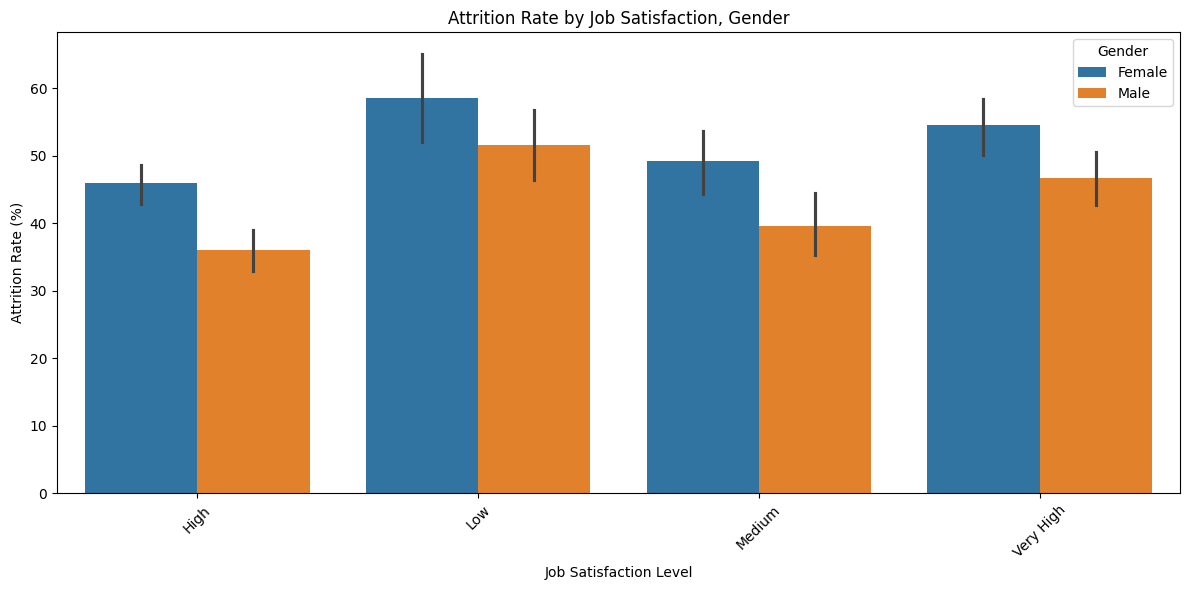

In [70]:
attrition_rate_by_factors = attrition_rate_by_factors.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Job Satisfaction', y='Attrition Rate', hue='Gender', data=attrition_rate_by_factors)
plt.title('Attrition Rate by Job Satisfaction, Gender')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CONCLUSION: Attrition rates are higher for females across all job satisfaction levels, with the highest attrition rates observed for both genders at low job satisfaction.

9. Job satisfaction, years at the company, and gender influencing the retension rate

In [71]:
attrition_rate_by_factors = df.groupby(['Job Satisfaction', 'Years at Company', 'Gender'])['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rate_by_factors['Retension Rate'] = attrition_rate_by_factors['Stayed'] * 100
print(attrition_rate_by_factors[['Retension Rate']])

Attrition                                 Retension Rate
Job Satisfaction Years at Company Gender                
High             1                Female       50.793651
                                  Male         56.069364
                 2                Female       41.333333
                                  Male         57.407407
                 3                Female       35.000000
...                                                  ...
Very High        49               Female       66.666667
                                  Male         50.000000
                 50               Female      100.000000
                                  Male        100.000000
                 51               Female       50.000000

[397 rows x 1 columns]


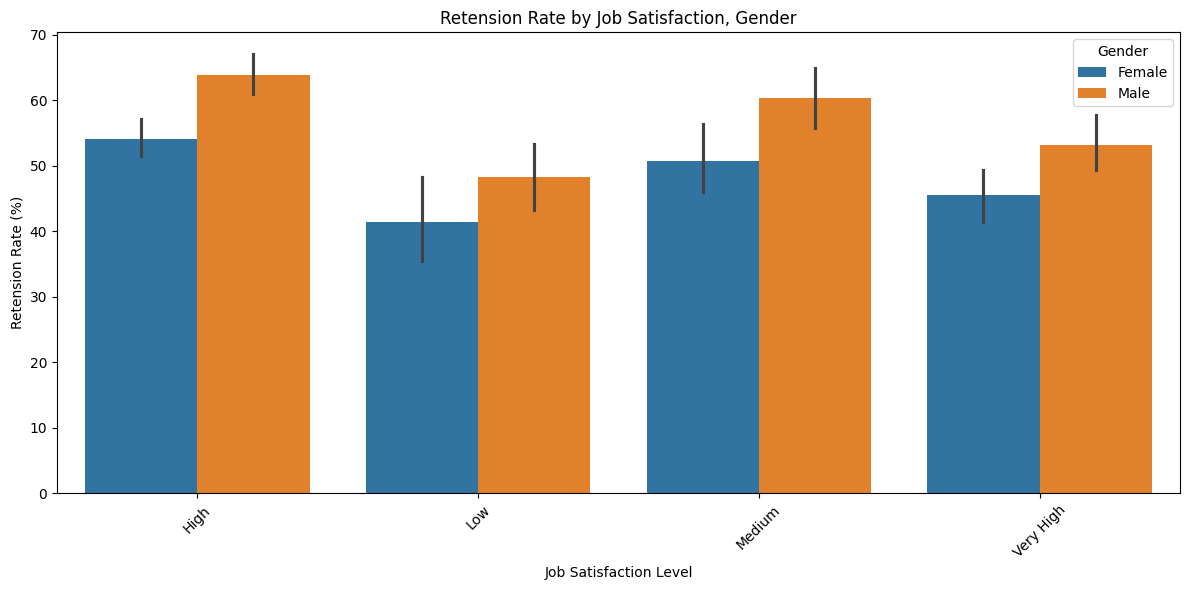

In [72]:
attrition_rate_by_factors = attrition_rate_by_factors.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Job Satisfaction', y='Retension Rate', hue='Gender', data=attrition_rate_by_factors)
plt.title('Retension Rate by Job Satisfaction, Gender')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Retension Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CONCLUSION:  Retension rates are higher for males across all job satisfaction levels, with the highest retension rates observed for both genders at high job satisfaction.

10. Job roles experiencing the highest levels of attrition among employees who work overtime

In [73]:
df1=df[df['Overtime']=='Yes']
atr=df1.groupby(['Job Role','Attrition']).size().unstack(fill_value=0)
atr['Attrition Rate']=(atr['Left']/(atr['Stayed']+atr['Left']))*100
atr=atr.reset_index().sort_values(by='Attrition Rate',ascending=False)
atr

Attrition,Job Role,Left,Stayed,Attrition Rate
2,Healthcare,597,512,53.832281
0,Education,548,492,52.692308
1,Finance,330,326,50.304878
4,Technology,652,646,50.231125
3,Media,382,406,48.477157


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12304\2752980172.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(atr,x='Job Role',y='Attrition Rate',palette='husl')


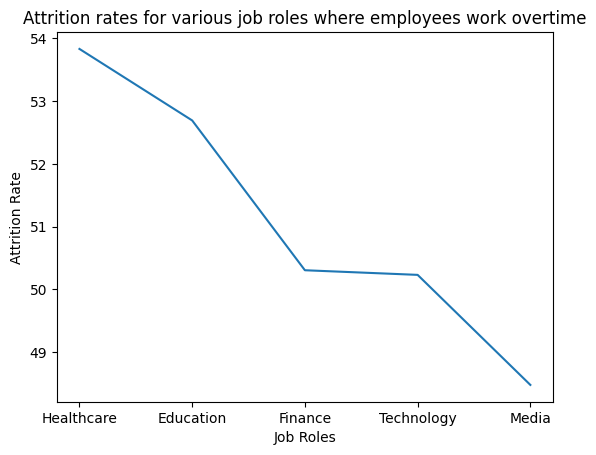

In [74]:
sns.lineplot(atr,x='Job Role',y='Attrition Rate',palette='husl')
plt.title('Attrition rates for various job roles where employees work overtime')
plt.xlabel('Job Roles')
plt.ylabel('Attrition Rate')
plt.show()

CONCLUSION: From the above line plot it can be understood the field of Healthcare and Education would have higher attrition rates among employees working overtime resulting that these roles may face more turnover under high work demands.

11. Impact of company size, reputation, and employee recognition on attrition rates

In [75]:
atr=df1.groupby(['Company Reputation','Employee Recognition','Attrition']).size().unstack(fill_value=0)
atr['Attrition Rate']=(atr['Left']/(atr['Stayed']+atr['Left']))*100
atr=atr.reset_index().sort_values(by='Attrition Rate',ascending=False).head(8)
atr

Attrition,Company Reputation,Employee Recognition,Left,Stayed,Attrition Rate
7,Fair,Very High,29,20,59.183673
12,Poor,High,153,110,58.174905
4,Fair,High,140,102,57.851240
13,Poor,Low,239,179,57.177033
15,Poor,Very High,25,19,56.818182
14,Poor,Medium,177,137,56.369427
3,Excellent,Very High,14,11,56.000000
6,Fair,Medium,169,138,55.048860


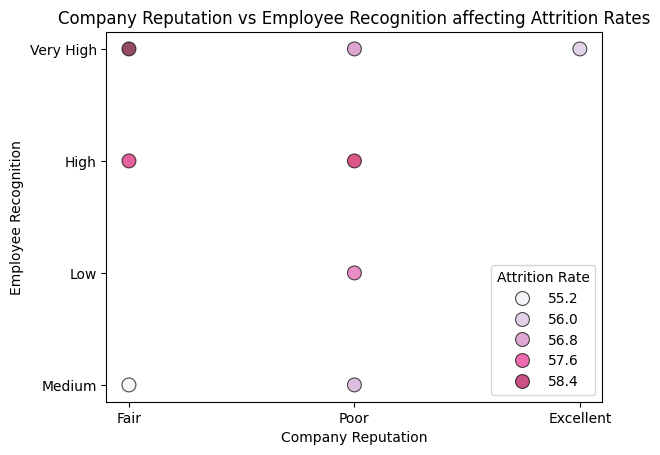

In [76]:
sns.scatterplot(data=atr,x='Company Reputation',y='Employee Recognition',hue='Attrition Rate',palette='PuRd',s=100, alpha=0.7, edgecolor='black')
plt.title('Company Reputation vs Employee Recognition affecting Attrition Rates')
plt.xlabel('Company Reputation')
plt.ylabel('Employee Recognition')
plt.show()

CONCLUSION:Employees at companies with fair to poor reputation and varied levels of recognition (high, medium, or very high) have the highest attrition rates, with a top rate of 59.18% for companies with fair reputation and very high recognition. This pattern suggests that a positive company reputation might be more critical to retaining employees than recognition alone, as even companies with high recognition levels still experience elevated attrition if their reputation is not strong.

12. Attrition in different job roles based on the distance from home of the employees

In [77]:
dist=df['Distance from Home'].mean()
print(dist)
dis1=df[(df['Attrition']=='Left') & (df['Distance from Home']>dist)]
dis1=dis1.sort_values(by='Distance from Home',ascending=False).head()
dis1[['Job Role','Distance from Home','Attrition']]

49.927315436241614


,Job Role,Distance from Home,Attrition
131,Healthcare,99,Left
1828,Healthcare,99,Left
1908,Finance,99,Left
1831,Technology,99,Left
11050,Healthcare,99,Left


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12304\400227085.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dis1, x='Job Role', y='Distance from Home', palette='afmhot')


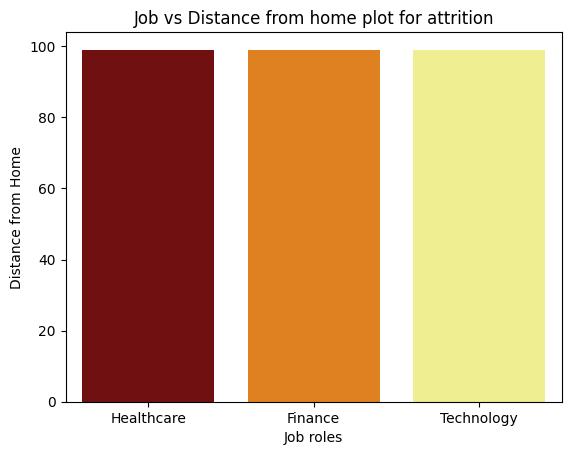

In [78]:
sns.barplot(data=dis1, x='Job Role', y='Distance from Home', palette='afmhot')
plt.title('Job vs Distance from home plot for attrition')
plt.xlabel('Job roles')
plt.ylabel('Distance from Home')
plt.show()

CONCLUSION: Since distance from home of employees in various jobs remain the same, it is not an important factor for determinig attrition.

13. Years at company vs Attrition

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12304\3524407789.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attrition',y='Years at Company',data=df,palette='rocket')


Text(0.5, 1.0, 'Years at company vs Attrition')

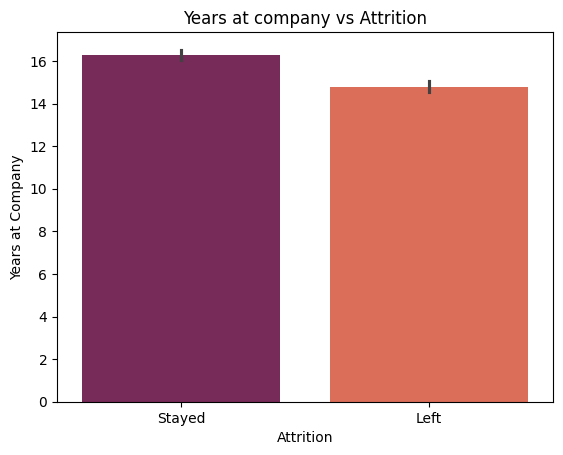

In [79]:
sns.barplot(x='Attrition',y='Years at Company',data=df,palette='rocket')
plt.title('Years at company vs Attrition')

CONCLUSION: Employees who stayed had a slightly higher average tenure than those who left, suggesting tenure may influence retention.








14. Relationship betwwen Martial status of Employees and Attrition

Text(0.5, 1.0, 'Attrition by Marital Status of the Employees')

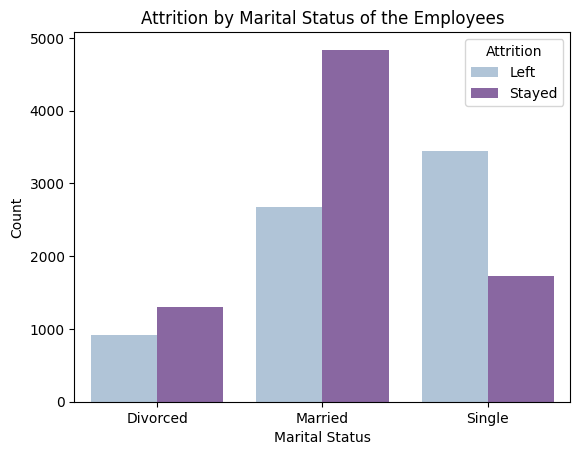

In [80]:
df11=df.groupby(['Attrition', 'Marital Status']).size().reset_index(name='Count')
sns.barplot(x='Marital Status',y='Count',hue='Attrition',data=df11,palette='BuPu')
df11
plt.title('Attrition by Marital Status of the Employees')

Conclusion: It could be visualized from this graph that the number of married employees stayed in the company than the single employees where majority of them left the company. The divorcede employees who stayed in the company exceeded slightly when compared with those left. 

## MACHINE LEARNING

Algorithms used: Logistic Regression,KNN,SVM,naive baiyers, decision tree, random forest

In [81]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [ ]:
x=df.iloc[:,:22].values
y=df['Attrition'].values
y = np.where(y == 'Left', 0, 1)  #to replace the y values to 0 and 1

In [103]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_x= LabelEncoder()

In [85]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [ ]:
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), [df.columns.get_loc(col) for col in df.columns[:22] if df[col].dtype == 'object'])
    ],
    remainder='passthrough'
)
x_transformed = ct.fit_transform(x)  #to convert strings to numerics using one hot encoder

In [105]:
df_transformed = pd.DataFrame(x_transformed)

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_transformed, y, test_size= 0.25,random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)  #to normalise

In [108]:
y_train=y_train.astype('int')

1. LOGISTIC REGRESSION

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='sag', max_iter=1000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='sag')

In [92]:
y_pred = logreg.predict(x_test)
y_pred = y_pred.astype(int)

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.748993288590604


In [96]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Best hyperparameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.7490


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packag

2.KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [110]:
y_pred= classifier.predict(x_test)
y_pred = y_pred.astype(int)

In [111]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 65.72


In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy: 0.6854


3.SVM

In [113]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [114]:
y_pred= classifier.predict(x_test)
y_pred = y_pred.astype(int)

In [115]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.11


In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
model = SVC()
param_grid = {
   'C':[0.01,0.1,1,10],

    'kernel' : ["linear","poly","rbf","sigmoid"],

    'degree' : [1,3,5,7],

    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)#cv=3,n_jobs=-1
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7485


4. NAIVE BAYES

In [117]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [118]:
y_pred = classifier.predict(x_test)
y_pred = y_pred.astype(int)

In [119]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))


Mean Absolute Error: 0.283489932885906
Mean Squared Error: 0.283489932885906
Root Mean Squared Error: 0.5324377267680287
Accuracy: 71.65


In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,n_jobs=-1)#cv=3,n_jobs=-1
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7522


5. DECISION TREE

In [125]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [126]:
y_pred= classifier.predict(x_test)
y_pred = y_pred.astype(int)

In [127]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.34


In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 7],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7157


6.RANDOM FOREST

In [129]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10,criterion="entropy")
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [130]:
y_pred= classifier.predict(x_test)
y_pred = y_pred.astype(int)


In [131]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.58


In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7442


CONCLUSION: It can be seen that naive bayes creates a model with better accuracy than other models of 75.22%.

## FINAL CONCLUSION:

The machine learning model for employee attrition achieved an accuracy of 75.22%. This indicates that factors such as age, gender, marital status, overtime and so on significantly influence employee retention. The model provides valuable insights for predicting attrition, though further fine-tuning could enhance its performance.